Import Libraries And Load Data


In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [169]:
data = pd.read_csv("HR_comma_sep.csv")
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [170]:
# Print Top 5 Rows
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [171]:
data.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


Data Cleaning

In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [219]:
data.duplicated().any()

True

In [221]:
data = data.drop_duplicates()

In [222]:
data.shape

(11991, 10)

In [223]:
# Check mising values
data.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [224]:
data['left'].value_counts()

left
0    10000
1     1991
Name: count, dtype: int64

In [225]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [177]:
# No missing values present in our datasets


Feature Engineering

In [226]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   Department             11991 non-null  int32  
 9   salary                 11991 non-null  int32  
dtypes: float64(2), int32(2), int64(6)
memory usage: 936.8 KB


In [142]:
# we have string values present in our datasets , we have to convert it into numerical values..

In [228]:
data.rename(columns = {'sales':'Department'},  inplace = True)

C:\Users\Parveen\AppData\Local\Temp\ipykernel_25044\3782997873.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns = {'sales':'Department'},  inplace = True)


In [229]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,4,0
11996,0.74,0.95,5,266,10,0,0,1,4,0
11997,0.85,0.54,3,185,10,0,0,1,4,0
11998,0.33,0.65,3,172,10,0,0,1,5,0


In [230]:
data['Department'].value_counts()

Department
7    3239
9    2244
8    1821
0     976
1     694
6     686
5     673
2     621
3     601
4     436
Name: count, dtype: int64

In [182]:
# we have to encode the categorical value into numerical value

In [232]:
from sklearn.preprocessing import LabelEncoder

In [233]:
Le  = LabelEncoder()

In [235]:
data['Department'] = Le.fit_transform(data['Department'])

C:\Users\Parveen\AppData\Local\Temp\ipykernel_25044\4097253263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Department'] = Le.fit_transform(data['Department'])


In [236]:
data['salary'] = Le.fit_transform(data['salary'])

C:\Users\Parveen\AppData\Local\Temp\ipykernel_25044\1224203279.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['salary'] = Le.fit_transform(data['salary'])


In [237]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,4,0
11996,0.74,0.95,5,266,10,0,0,1,4,0
11997,0.85,0.54,3,185,10,0,0,1,4,0
11998,0.33,0.65,3,172,10,0,0,1,5,0


Split Training And Testing Data

In [238]:
from sklearn.model_selection import train_test_split

In [239]:
X = data.drop('left' , axis = 1)
y = data['left']

In [240]:
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,0,7,1
1,0.80,0.86,5,262,6,0,0,7,2
2,0.11,0.88,7,272,4,0,0,7,2
3,0.72,0.87,5,223,5,0,0,7,1
4,0.37,0.52,2,159,3,0,0,7,1
...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,1,4,0
11996,0.74,0.95,5,266,10,0,1,4,0
11997,0.85,0.54,3,185,10,0,1,4,0
11998,0.33,0.65,3,172,10,0,1,5,0


In [241]:
y.shape


(11991,)

In [256]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.20 , random_state = 42)

In [257]:
print(X_train.shape)
print(y_train.shape)

(9592, 9)
(9592,)


In [259]:
print(X_test.shape)
print(y_test.shape)

(2399, 9)
(2399,)


In [260]:
# feature scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test =  sc.transform(X_test)


Machine Model Creation 

In [161]:
# So this is classification  problem so we have to use classification algorithm like LOgistic , Decistion Tree , Random Forest

In [261]:
from sklearn.linear_model import LogisticRegression

In [262]:
from sklearn.ensemble import RandomForestClassifier

In [263]:
from sklearn.tree import DecisionTreeClassifier

In [277]:
import warnings 
warnings.filterwarnings('ignore')

In [265]:
from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report , confusion_matrix

1 Logistic Regression

In [266]:
Reg = LogisticRegression()

In [267]:
# gridsearchcv for best parameter selection

In [268]:
from sklearn.model_selection import GridSearchCV


In [273]:
parameter = {'penalty' : ['l1' , 'l2' , 'elasticnet'] , 'C':[1, 2, 3, 4, 5, 10, 20, 40, 50] , 'max_iter': [100 , 200 ,300]}

In [275]:
classifier_regression = GridSearchCV(Reg , scoring = 'accuracy' , cv =5 , param_grid = parameter)

In [296]:
classifier_regression.fit(X_train , y_train )
import tkinter as tk
from tkinter import messagebox
from sklearn.preprocessing import StandardScaler
import pandas as pd
import pickle

# Load the trained model
with open('classifier_regression.pkl', 'rb') as file:
    model = pickle.load(classifier_regression.pkl)


FileNotFoundError: [Errno 2] No such file or directory: 'classifier_regression.pkl'

In [282]:
print(classifier_regression.best_params_)

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}


In [283]:
y_pred = classifier_regression.predict(X_test)

In [284]:
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [286]:
score = accuracy_score(y_pred , y_test )
score

0.8332638599416423

In [287]:
print(classification_report(y_pred , y_test ))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91      2246
           1       0.19      0.50      0.28       153

    accuracy                           0.83      2399
   macro avg       0.58      0.68      0.59      2399
weighted avg       0.91      0.83      0.87      2399



In [289]:
cn_matrix = confusion_matrix(y_test , y_pred)
cn_matrix

array([[1922,   76],
       [ 324,   77]], dtype=int64)

<Axes: >

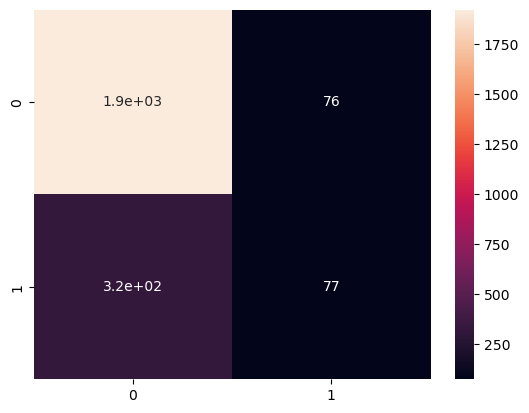

In [290]:
sns.heatmap(cn_matrix , annot = True)


In [300]:
with open('classifier_regression.pkl', 'wb') as f:
    pickle.dump(classifier_regression, f)

In [1]:
import tkinter as tk
from tkinter import messagebox
from sklearn.preprocessing import StandardScaler
import pandas as pd
import pickle

# Load the trained model
with open('classifier_regression.pkl', 'rb') as file:
    model = pickle.load(file)

# Create a function to make predictions
def predict():
    satisfaction_level = float(satisfaction_entry.get())
    last_evaluation = float(last_evaluation_entry.get())
    number_project = int(number_project_entry.get())
    average_montly_hours = int(average_montly_hours_entry.get())
    time_spend_company = int(time_spend_company_entry.get())
    Work_accident = int(Work_accident_entry.get())
    promotion_last_5years = int(promotion_last_5years_entry.get())
    Department = department_var.get()
    if Department == "sales":
        Department = 7
    elif Department == "technical":
        Department = 9
    elif Department == "support":
        Department = 8
    elif Department == "IT":
        Department = 0
    elif Department == "product_mng":
        Department = 6
    elif Department == "marketing":
        Department = 5
    elif Department == "RandD":
        Department = 4
    elif Department == "accounting":
        Department = 1
    elif Department == "hr":
        Department = 2
    elif Department == "management":
        Department = 3
    salary = salary_var.get()
    if salary == "low":
        salary = 1
    elif salary == "medium":
        salary = 2
    elif salary == "high":
        salary = 0
    
    # Feature scaling
    data = pd.DataFrame({'satisfaction_level': [satisfaction_level],
                         'last_evaluation': [last_evaluation],
                         'number_project': [number_project],
                         'average_montly_hours': [average_montly_hours],
                         'time_spend_company': [time_spend_company],
                         'Work_accident': [Work_accident],
                         'promotion_last_5years': [promotion_last_5years],
                         'Department': [Department],
                         'salary': [salary]})
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    
    # Make prediction
    prediction = model.predict(data_scaled)
    if prediction == 1:
        result_label.config(text="The employee might leave.")
    else:
        result_label.config(text="The employee might not leave.")

# Create the main window
root = tk.Tk()
root.title("Employee Attrition Prediction")
root.geometry("400x400")

# Create input fields and labels
satisfaction_label = tk.Label(root, text="Satisfaction Level:")
satisfaction_label.pack()
satisfaction_entry = tk.Entry(root)
satisfaction_entry.pack()

last_evaluation_label = tk.Label(root, text="Last Evaluation:")
last_evaluation_label.pack()
last_evaluation_entry = tk.Entry(root)
last_evaluation_entry.pack()

number_project_label = tk.Label(root, text="Number of Projects:")
number_project_label.pack()
number_project_entry = tk.Entry(root)
number_project_entry.pack()

average_montly_hours_label = tk.Label(root, text="Average Monthly Hours:")
average_montly_hours_label.pack()
average_montly_hours_entry = tk.Entry(root)
average_montly_hours_entry.pack()

time_spend_company_label = tk.Label(root, text="Time Spent in Company (years):")
time_spend_company_label.pack()
time_spend_company_entry = tk.Entry(root)
time_spend_company_entry.pack()

Work_accident_label = tk.Label(root, text="Work Accident (1 if yes, 0 if no):")
Work_accident_label.pack()
Work_accident_entry = tk.Entry(root)
Work_accident_entry.pack()

promotion_last_5years_label = tk.Label(root, text="Promotion Last 5 Years (1 if yes, 0 if no):")
promotion_last_5years_label.pack()
promotion_last_5years_entry = tk.Entry(root)
promotion_last_5years_entry.pack()

department_label = tk.Label(root, text="Department:")
department_label.pack()
department_var = tk.StringVar(root)
department_var.set("sales")  # default value
department_option = tk.OptionMenu(root, department_var, "sales", "technical", "support", "IT", "product_mng", "marketing", "RandD", "accounting", "hr", "management")
department_option.pack()

salary_label = tk.Label(root, text="Salary:")
salary_label.pack()
salary_var = tk.StringVar(root)
salary_var.set("low")  # default value
salary_option = tk.OptionMenu(root, salary_var, "low", "medium", "high")
salary_option.pack()

# Create a button to trigger prediction
predict_button = tk.Button(root, text="Predict", command=predict)
predict_button.pack()

# Create a label to display the result
result_label = tk.Label(root, text="")
result_label.pack()

# Run the main event loop
root.mainloop()